In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

## Gather

In [60]:
#read twitter-archive-enhanced.csv into twitter_archive dataframe
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')


In [61]:
#save the image-predictions.tsv file and load it into image_predictions dataframe
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open ('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
image_predictions = pd.read_csv('image-predictions.tsv',sep="\t")

In [62]:
# As suggested in review I have commented the code to query the twitter API.

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

#tweet_ids = twitter_archive.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    #for tweet_id in tweet_ids:
        #count += 1
        #print(str(count) + ": " + str(tweet_id))
        #try:
            #tweet = api.get_status(tweet_id, tweet_mode='extended')
            #print("Success")
            #json.dump(tweet._json, outfile)
            #outfile.write('\n')
        #except tweepy.TweepError as e:
            #print("Fail")
            #fails_dict[tweet_id] = e
            #pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [63]:
df_tweets = pd.DataFrame(columns = ['tweet_id','retweet_count','favorite_count'])
with open('tweet_json.txt') as file:
    for line in file:
        status = json.loads(line)
        tweet_id = status['id_str']
        rt_count = status['retweet_count']
        fav_count = status['favorite_count']
        df_tweets = df_tweets.append(pd.DataFrame([[tweet_id,rt_count,fav_count]],columns = ['tweet_id','retweet_count','favorite_count'] ))
        
    

## Assess

DETECT

In [64]:
# check for the records
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [65]:
#size of the df
twitter_archive.shape

(2356, 17)

In [66]:
# df information
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [67]:
#check for nulls
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [68]:
# duplicate record check
twitter_archive.duplicated().sum()

0

In [69]:
# check for the records
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [70]:
#size check
image_predictions.shape

(2075, 12)

In [71]:
#informtion about the df
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [72]:
# null records check
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [73]:
# duplicate record check
image_predictions.duplicated().sum()

0

In [74]:
# check for the records
df_tweets.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
0,892177421306343426,6514,33819
0,891815181378084864,4328,25461
0,891689557279858688,8964,42908
0,891327558926688256,9774,41048


In [75]:
# size check
df_tweets.shape

(2354, 3)

In [76]:
# df inoformation
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 0
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null object
favorite_count    2354 non-null object
dtypes: object(3)
memory usage: 73.6+ KB


In [77]:
# null records check
df_tweets.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [78]:
# duplicate records check
df_tweets.duplicated().sum()

0

DOCUMENT

### Quality
 
In twitter_archive dataframe:

       - Many retweet rows. (Validity)
       - Many in_reply__to_user_id rows with the same information.(Validity)
       - Incorrect values in rating_numerator column.
       - Incorrect data types of tweet_id and retweeted_status_timestamp.                (Consistency)
       - in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,
         retweeted_status_user_id and retweeted_status_timestamp columns 
         have majority null values.(Completeness)
       - The name column has invalid values like 'a','an','all','this',
         'quite'.(Validity)
       - rating_denominator column does not have consistent values of 10.               (Accuracy)
       - The 'expanded_urls' column does not convey any uselful information 
         and is redundant.
       
       
In image_predictions dataframe:
       
       - 'img_num' column has values mostly 1.(Validity)
       -  few data do not have predictions at all. Its none for all the 
          values.(Validity)
        

## Tidiness


In twitter_archive dataframe:
          
         - 4 columns(doggo,fluffer,pupper,puppo) which are cute names 
         given to the dogs.
         - df_tweets does not carry majority details and so it can be 
         merged with existing table.

## Clean

In [79]:
# Create copies of the dataframes.
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
df_tweets_clean = df_tweets.copy()

### Completeness issues

in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id,                retweeted_status_user_id and retweeted_status_timestamp columns have            majority null values.

### Define

Drop the columns'in_reply_to_user_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp' from twitter_archive_clean table. 'in_reply_to_status_id', 'retweeted_status_id' will be dropped once the data quality issues are fixed.

### Code

In [80]:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_user_id','retweeted_status_user_id','retweeted_status_timestamp'],axis = 1)

### Test

In [81]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'timestamp', 'source', 'text',
       'retweeted_status_id', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

###  Tidiness Issues
1. 4 columns(doggo,fluffer,pupper,puppo) which are cute names given to      the dogs.

### Define

Create a single column named 'Dog_type' combining all these values and then drop the 4 columns


### Code

In [82]:
twitter_archive_clean['Dog_type'] = twitter_archive_clean['doggo'] + twitter_archive_clean['floofer'] + twitter_archive_clean['pupper'] + twitter_archive_clean['puppo']

In [83]:
twitter_archive_clean['Dog_type'].value_counts()

NoneNoneNoneNone        1976
NoneNonepupperNone       245
doggoNoneNoneNone         83
NoneNoneNonepuppo         29
doggoNonepupperNone       12
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: Dog_type, dtype: int64

In [84]:
# replace none with a space in all values
twitter_archive_clean['Dog_type'] = twitter_archive_clean['Dog_type'].map(lambda x:x.replace("None",""))

In [85]:
twitter_archive_clean['Dog_type'].value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggofloofer       1
doggopuppo         1
Name: Dog_type, dtype: int64

In [86]:
# add space for multiple values
twitter_archive_clean.loc[twitter_archive_clean.Dog_type == 'doggopupper'] = "doggo,pupper"
twitter_archive_clean.loc[twitter_archive_clean.Dog_type == 'doggopuppo'] = "doggo,puppo"
twitter_archive_clean.loc[twitter_archive_clean.Dog_type == 'doggofloofer'] = "doggo,floofer"

In [87]:
twitter_archive_clean['Dog_type'].value_counts()

                 1976
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: Dog_type, dtype: int64

In [88]:
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis =1, inplace=True)

### Test

In [89]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'timestamp', 'source', 'text',
       'retweeted_status_id', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'Dog_type'],
      dtype='object')

2. df_tweets does not carry majority details and so it can be merged with existing table.

### Define

Merge df_tweets_clean table with twitter_archive_clean on tweet_id column

### Code

In [90]:
# since the data type of tweet id is different in both tables, change it to str and then merge
df_tweets_clean = pd.DataFrame(df_tweets_clean, columns=["tweet_id", "retweet_count", "favorite_count"])
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype('str')
twitter_archive_clean = pd.merge(twitter_archive_clean,df_tweets_clean, on = ['tweet_id'], how = 'left')

### Test

In [91]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'timestamp', 'source', 'text',
       'retweeted_status_id', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'Dog_type', 'retweet_count',
       'favorite_count'],
      dtype='object')

In [92]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,Dog_type,retweet_count,favorite_count
0,892420643555336193,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,8853,39467
1,892177421306343426,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,6514,33819
2,891815181378084864,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,4328,25461
3,891689557279858688,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,8964,42908
4,891327558926688256,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,9774,41048


### Quality Issues

In twitter_archive dataframe:
     1. Many retweet rows.

       

### Define:
    Remove the rows which contain retweets and then drop the retweeted_status_id column.

### Code

In [94]:
re_status_ind = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull() == False].index
re_status_ind

Int64Index([  19,   32,   36,   68,   73,   74,   78,   91,   95,   97,
            ...
             949,  956, 1012, 1023, 1043, 1063, 1113, 1242, 2259, 2260],
           dtype='int64', length=193)

In [95]:
twitter_archive_clean.drop(index = re_status_ind, axis = 0, inplace = True)

In [97]:
twitter_archive_clean.drop('retweeted_status_id', axis = 1, inplace = True)

### Test

In [98]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'timestamp', 'source', 'text',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'Dog_type', 'retweet_count', 'favorite_count'],
      dtype='object')

In [99]:
# the retweet rows are deleted from the dataframe
for retweet in re_status_ind:
    if retweet in list(twitter_archive_clean.index):
        print('Found a retweet')

2. Redundant in_reply_to_user rows with same information

### Define:
    To overcome the same information remove the rows having 
    the in_reply_status_id column not null and then drop this 
    column too..

### Code

In [100]:
reply_ind = twitter_archive_clean[twitter_archive_clean['in_reply_to_status_id'].isnull() == False].index
reply_ind

Int64Index([  30,   55,   64,  113,  148,  149,  179,  184,  186,  188,  189,
             218,  228,  234,  251,  274,  290,  291,  313,  342,  346,  387,
             409,  427,  498,  513,  570,  576,  611,  701,  843,  857,  967,
            1005, 1016, 1018, 1080, 1127, 1295, 1330, 1339, 1345, 1356, 1446,
            1452, 1464, 1474, 1479, 1497, 1501, 1523, 1598, 1605, 1618, 1630,
            1634, 1663, 1689, 1774, 1819, 1842, 1844, 1852, 1866, 1882, 1885,
            1892, 1895, 1905, 1914, 1940, 2036, 2038, 2149, 2169, 2189, 2298],
           dtype='int64')

In [101]:
twitter_archive_clean.drop(index = reply_ind, inplace = True)

In [102]:
twitter_archive_clean.drop('in_reply_to_status_id',axis = 1,inplace = True)

### Test

In [103]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'Dog_type',
       'retweet_count', 'favorite_count'],
      dtype='object')

In [104]:
# the retweet rows are deleted from the dataframe
for retweet in reply_ind:
    if retweet in list(twitter_archive_clean.index):
        print('Found a retweet')

3. Wrong data in rating_numerator column

### Define:
    Extract the right ratings from the text column and convert 
    the rating_numerator column to float type

### Code

In [106]:
twitter_archive_clean['rating_numerator']= twitter_archive_clean['text'].str.extract(r'([0-9]+[0-9.]*/[0-9]+[0-9]*)',expand=False).str.split('/').str[0]

In [107]:
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)

### Test

In [108]:
twitter_archive_clean['rating_numerator'].value_counts()

12.00      480
10.00      435
11.00      412
13.00      285
9.00       153
8.00        98
7.00        52
14.00       38
6.00        32
5.00        32
3.00        19
4.00        16
2.00         9
1.00         5
13.50        1
0.00         1
24.00        1
84.00        1
420.00       1
1776.00      1
80.00        1
60.00        1
44.00        1
144.00       1
88.00        1
11.26        1
11.27        1
121.00       1
9.75         1
99.00        1
204.00       1
45.00        1
165.00       1
50.00        1
Name: rating_numerator, dtype: int64

4.  Incorrect data types of tweet_id((Consistency),timestamp and retweeted_status_timestamp(Accuracy).

### Define
The tweet_id was corrected during the merge operation performed above 
and the retweeted_status_timestamp column is already dropped due to its null values. Convert timestamp column to datetime type

### Code

In [109]:
twitter_archive_clean['timestamp'] = pd.to_datetime(
    twitter_archive_clean['timestamp'],errors = 'coerce')

### Test

In [110]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'Dog_type',
       'retweet_count', 'favorite_count'],
      dtype='object')

In [111]:
twitter_archive_clean.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator             float64
rating_denominator            object
name                          object
Dog_type                      object
retweet_count                 object
favorite_count                object
dtype: object

 This is already taken care in the completeness section of the project
2. in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id and retweeted_status_timestamp columns have majority null values.

3. The 'source' column has the same value for almost all the rows. 

### Define

Delete this column as it does not help in analyzing the data

### Code

In [112]:
twitter_archive_clean.drop('source',axis = 1,inplace = True)

### Test

In [113]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'Dog_type', 'retweet_count',
       'favorite_count'],
      dtype='object')

4. The name column has invalid values like 'a','an','all','this',
    'quite'.

### Define

Create a dictionary of wrong names and replace those values with "None"

### Code

In [117]:
not_names = twitter_archive_clean[twitter_archive_clean.name.str.islower()]['name'].unique()

In [118]:
not_names

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my',
       'his', 'an', 'actually', 'getting', 'mad', 'this', 'unacceptable',
       'all', 'old', 'infuriating', 'just', 'the', 'by', 'officially',
       'life', 'light', 'space'], dtype=object)

In [119]:
twitter_archive_clean.name = twitter_archive_clean.name.replace(not_names, 'None')

### Test

In [120]:
twitter_archive_clean[twitter_archive_clean.name.str.islower()]['name'].unique()

array([], dtype=object)

rating_denominator column does not have consistent values of 10

### Define
Find the rows where the rating_denominator is not 10 and then drop them

In [121]:
denom_not10 = twitter_archive_clean.query('rating_denominator != 10').index

In [122]:
twitter_archive_clean.drop(index = denom_not10,axis = 0,inplace = True)

### Test

In [123]:
twitter_archive_clean.query('rating_denominator != 10')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,Dog_type,retweet_count,favorite_count


The 'expanded_urls' column does not convey any uselful information 
and is redundant

### Define
Drop the column as it does not seem to be of any significance for the analysis

### Code

In [124]:
twitter_archive_clean.drop('expanded_urls',axis = 1,inplace = True)

### Test

In [125]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'Dog_type', 'retweet_count',
       'favorite_count'],
      dtype='object')

'img_num' column has values mostly 1.

### Define

Drop the column as it does not help in analysis because of the same values

### Code

In [126]:
image_predictions_clean.drop('img_num',axis = 1,inplace = True)

### Test

In [127]:
image_predictions_clean.columns

Index(['tweet_id', 'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

few data do not have predictions at all. Its False for all the 
values

### Define
Find the rows where all the 3 predictions are False and drop them

### Code

In [128]:
false_pred = image_predictions_clean.query('p1_dog == False and p2_dog == False and p3_dog == False ').index
image_predictions_clean.drop(index = false_pred,inplace = True)

### Test

In [129]:
image_predictions_clean.query('p1_dog == False and p2_dog == False and p3_dog == False ')

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Store Data

In [130]:
image_predictions_clean.to_csv('image_predictions_cleaned.csv',index = False)

In [131]:
twitter_archive_clean.to_csv('twitter_master.csv',index = False)

In [132]:
# read the wrangled dataset
df = pd.read_csv('twitter_master.csv')

In [133]:
df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,Dog_type,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,NaN,8853,39467
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,NaN,6514,33819
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,NaN,4328,25461
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,NaN,8964,42908
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,NaN,9774,41048


In [134]:
# drop the columns to proceed with the analysis
df.drop(['timestamp','text','name'],axis = 1,inplace = True)

In [136]:
# drop rows that have rating_numerator greater than 15 for better analysis
ind_del = df.query('rating_numerator >= 15.00').index
df.drop(index = ind_del,inplace = True)

Text(0.5,1,'Rating numerator count')

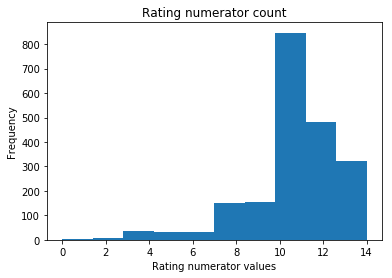

In [137]:
# plot rating numerator values and see the range
plt.hist(df['rating_numerator']);
plt.xlabel('Rating numerator values')
plt.ylabel('Frequency')
plt.title('Rating numerator count')

Most of the values are between 10 and 12.

Text(0.5,1,'Rating numerator vs retweet count distribution')

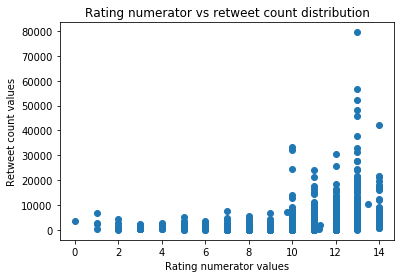

In [138]:
# plot retweet count vs rate numerator
plt.scatter(x = df['rating_numerator'],y = df['retweet_count'])
plt.xlabel('Rating numerator values')
plt.ylabel('Retweet count values')
plt.title('Rating numerator vs retweet count distribution')

Relation is established between retweet count and the rating

Text(0.5,1,'Rating numerator vs favorite count distribution')

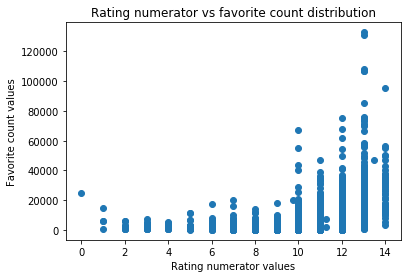

In [139]:
# plot favorite count vs rate numerator
plt.scatter(x = df['rating_numerator'],y = df['favorite_count'])
plt.xlabel('Rating numerator values')
plt.ylabel('Favorite count values')
plt.title('Rating numerator vs favorite count distribution')

Relation is established between favorite count and the rating

In [140]:
#The dog types which have maximum retweet counts. So use dog types which actually have values
df_DogType = df[df['Dog_type'].isnull() == False]

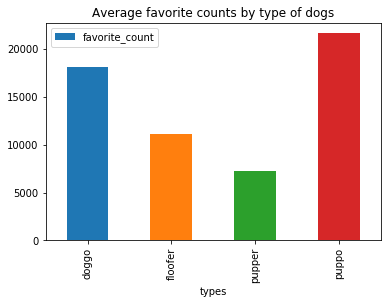

In [141]:
type_group = df_DogType.query('Dog_type=="pupper" or Dog_type=="doggo" or Dog_type=="puppo" or Dog_type=="floofer"')
favorite_counts_by_type = pd.DataFrame(type_group.groupby('Dog_type').favorite_count.mean())
favorite_counts_by_type['types'] = favorite_counts_by_type.index
favorite_counts_by_type.plot(x="types",y='favorite_count',kind = 'bar',title="Average favorite counts by type of dogs")

Puppo is the most favorite dog type

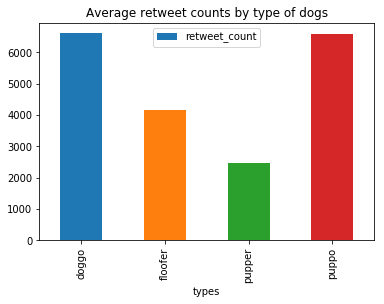

In [142]:
# Retweet count by dog type
retweet_counts_by_type = pd.DataFrame(type_group.groupby('Dog_type').retweet_count.mean())
retweet_counts_by_type['types'] = retweet_counts_by_type.index
retweet_counts_by_type.plot(x="types",y='retweet_count',kind = 'bar',title="Average retweet counts by type of dogs")

Doggo and Puppo seem to have the same average retweet counts 

Limitations:
    1. The data collected is of a small size and hence the predictions made
    cannot be trusted completely.
    2. All the predictions made are based on the analyses done initially and
    so is prone for correction.

Insights:
    1. Puppies are the most favorite dog type.
    2. General dogs(doggo) and Puppies (Puppo) have become the talk of the 
       town with most average tweets.

Basic idea of questioning and retweets was referred to in this link:
https://towardsdatascience.com/data-analysis-project-weratedogs-16aad3f6c8c2